In [13]:
import pandas as pd
import numpy as np

In [14]:
backward_overlap, no_overlap, forward_overlap = [], [], []

In [15]:
f = open("./DGX1_VGG16_scaled.txt", "r")

In [16]:
while True:
    line = f.readline()
    if not line:
        break

    tokens = line.split()
    
    backward_overlap.append(float(tokens[0]))
    no_overlap.append(float(tokens[1]))
    forward_overlap.append(float(tokens[2]))
f.close()

In [17]:
scales_list = np.arange(1, 100, 1)
b_ov = np.array(backward_overlap)/1000
n_ov = np.array(no_overlap)/1000
f_ov = np.array(forward_overlap)/1000

In [18]:
B1=18
B32=140

x_original = 1835238
time_list = scales_list*x_original/1000
time_list_ms = time_list/1000
b1_vline = np.argmin(abs(time_list_ms-B1))
b32_vline = np.argmin(abs(time_list_ms-B32))

In [19]:
import matplotlib.pyplot as plt

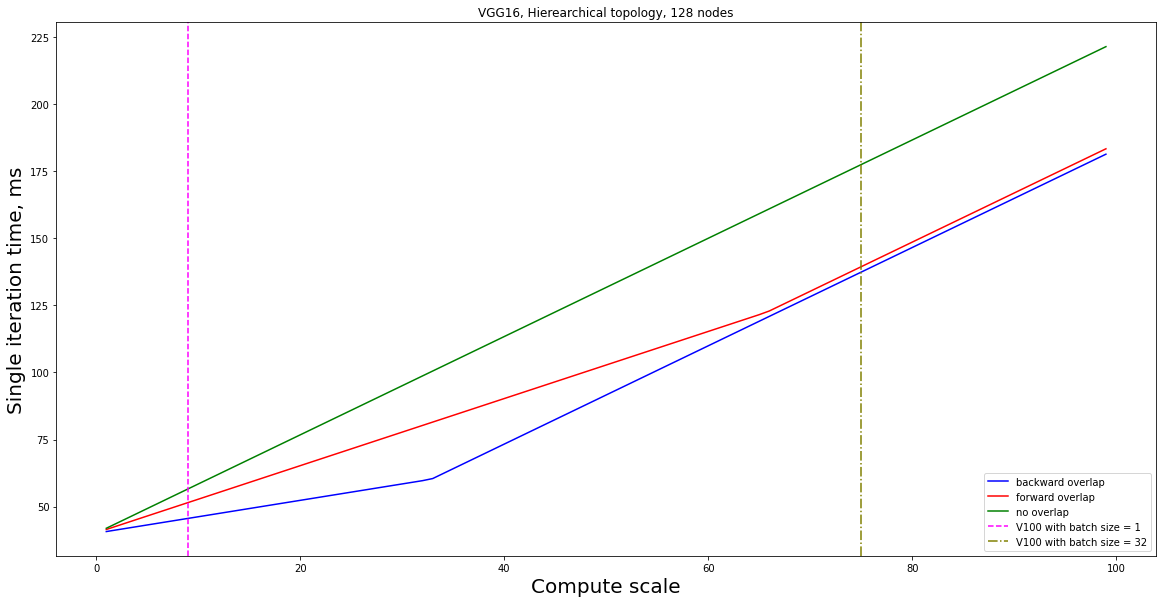

In [20]:
fig = plt.figure(figsize=(16,8), facecolor='white')
ax = fig.add_subplot(111)

plt.tight_layout()

plt.xlabel('Compute scale', fontsize=20)
plt.ylabel('Single iteration time, ms', fontsize=20)
plt.title('VGG16, Hierearchical topology, 128 nodes')
plt.xticks()

ax.plot(scales_list, b_ov, label='backward overlap', color='blue')
ax.plot(scales_list, f_ov, label='forward overlap', color='red')
ax.plot(scales_list, n_ov, label='no overlap', color='green')

plt.axvline(x=b1_vline, color='magenta', linestyle='--', label='V100 with batch size = 1')
plt.axvline(x=b32_vline, color='olive', linestyle='-.', label = 'V100 with batch size = 32')

plt.legend()
plt.show()

9

75